# Life Expectancy Vs GDP project
### Scope  
In this project I will explore the ralationship life expectancy and GDP accross six countries.
In this project I will:
* Plot the data to uncover trends in the data
* Possibly use hypothesis testing and regression analysis to determing the strenght of relationships that I find.


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#Loading data 
df = pd.read_csv('all_data.csv')

#Cleaning data by renaming
df.replace('United States of America', 'USA', inplace = True)
print(df.columns)
new_col_names = {}
for col_name in df.columns:
    new_col_names[col_name] = col_name.replace(' ', '_').replace('(', '').replace(')','') 
    
print(new_col_names)

df.rename(columns=new_col_names, inplace = True)

print(df.columns)

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')
{'Country': 'Country', 'Year': 'Year', 'Life expectancy at birth (years)': 'Life_expectancy_at_birth_years', 'GDP': 'GDP'}
Index(['Country', 'Year', 'Life_expectancy_at_birth_years', 'GDP'], dtype='object')


In [121]:
### Here I beggin by separating the data related to different countries so that I can analyse them separately.
countries = df.Country.unique()
print(countries)
country_variable_names = []
for country in countries:
    country_variable_names.append(f'{country}_data')

#print(countries)
print(country_variable_names)

for i in range(len(countries)):
    country_variable_names[i] = df.loc[df.Country == countries[i], :].reset_index(drop=True)
    

for name in country_variable_names:
    print(name.head())

['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']
['Chile_data', 'China_data', 'Germany_data', 'Mexico_data', 'USA_data', 'Zimbabwe_data']
  Country  Year  Life_expectancy_at_birth_years           GDP
0   Chile  2000                            77.3  7.786093e+10
1   Chile  2001                            77.3  7.097992e+10
2   Chile  2002                            77.8  6.973681e+10
3   Chile  2003                            77.9  7.564346e+10
4   Chile  2004                            78.0  9.921039e+10
  Country  Year  Life_expectancy_at_birth_years           GDP
0   China  2000                            71.7  1.211350e+12
1   China  2001                            72.2  1.339400e+12
2   China  2002                            72.7  1.470550e+12
3   China  2003                            73.1  1.660290e+12
4   China  2004                            73.5  1.955350e+12
   Country  Year  Life_expectancy_at_birth_years           GDP
0  Germany  2000                            78.0  

Firstly the main focous of the project is looking at relationships between GDP and life expectancy, both of which are numerical data types. It might be useful to plot these relationships via a scatter plot.<br>
<br>
The other main variable we are interested in is Country which is a categorical variable. It may be possible to create so three way charts. like a scatter plot where country data is represented by different colours. <br>


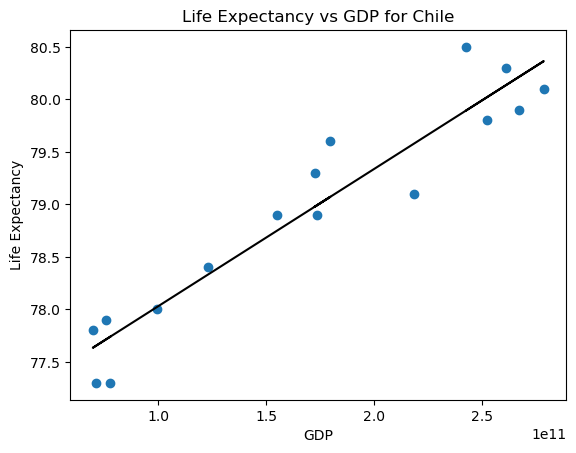

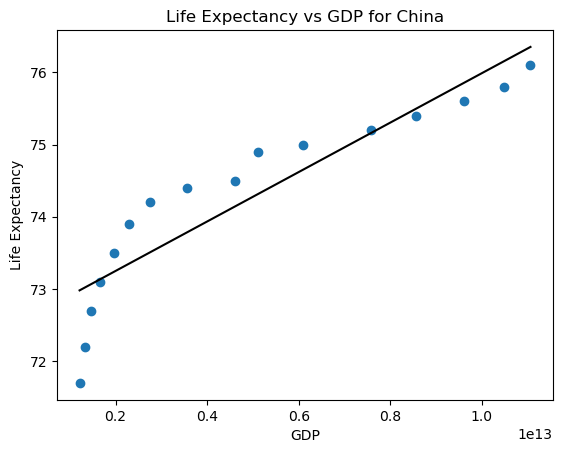

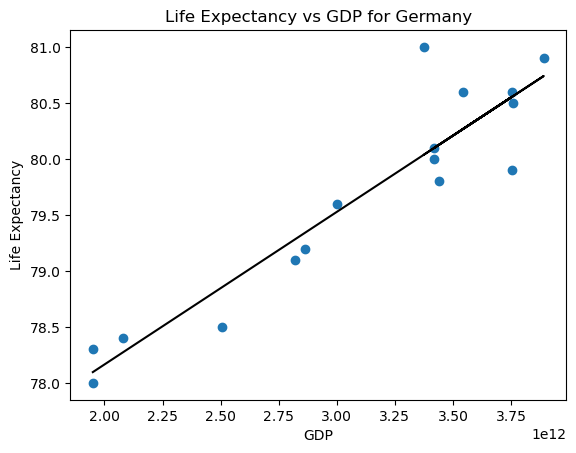

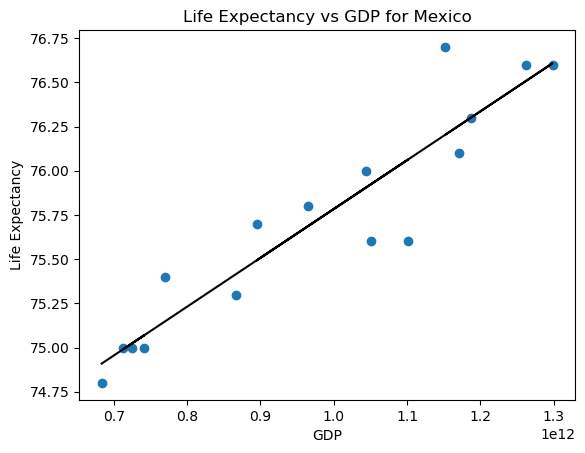

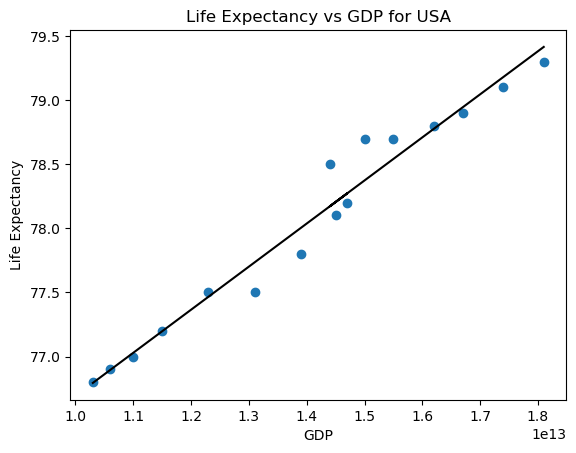

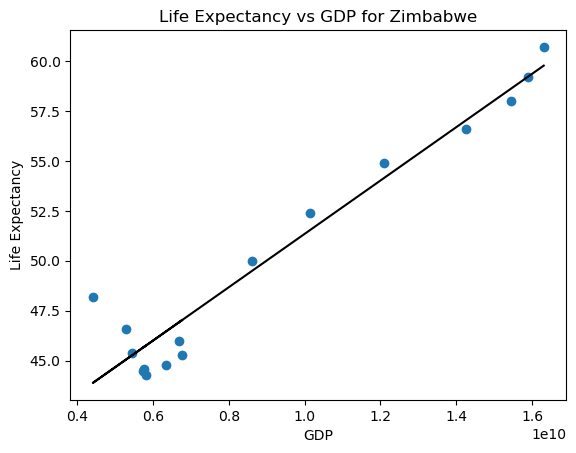

<Figure size 640x480 with 0 Axes>

In [129]:
for name in country_variable_names:
    country = name.Country[0]
    
    model = sm.OLS.from_formula('Life_expectancy_at_birth_years ~ GDP', name)
    results = model.fit()
    fitted_values = results.predict(name.GDP)
    
    plt.scatter(name['GDP'], name['Life_expectancy_at_birth_years'])
    plt.plot(name.GDP, fitted_values, color="black")
    plt.title(f'Life Expectancy vs GDP for {country}')
    plt.ylabel('Life Expectancy')
    plt.xlabel('GDP')
    plt.show()
    plt.clf()


The above plots suggest that higher GDP is posotively correlated with higher life expectency relative to each country. 

Now I look at how gdp is related to life expectancy accross the whole data set.

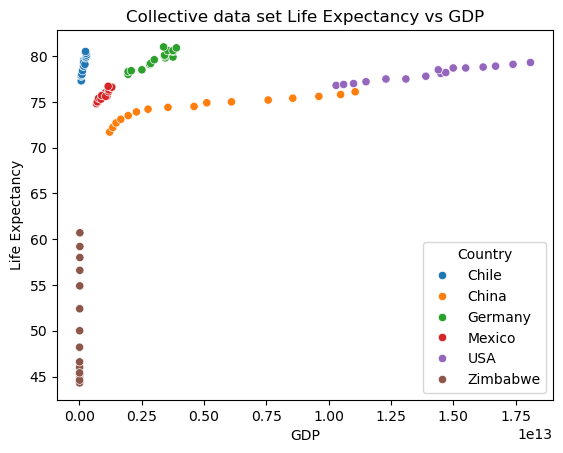

In [91]:
sns.scatterplot(x = 'GDP', y = 'Life expectancy at birth (years)', data = df, hue = 'Country')
plt.title('Collective data set Life Expectancy vs GDP')
plt.ylabel('Life Expectancy')
plt.xlabel('GDP')
plt.show()

Clearly the above plot is not usefull since gdp changes so much between countries. China wipes out everyone else except america.

It is clear that amoung individual countries the life expectancy increases when the gdp of the country increases. But does this hold between countries?
To investigate this I will calculate the average gdp of each country and rank them from smallest to largest, then plot average life expectancy of a country vs country using a box plot or a bar plot.

In [92]:
gdp_means = []
columns = ['Country', 'mean_gdp', 'mean_life_expectancy']
for country_data in country_variable_names:
    new_list = [country_data.Country[0], np.mean(country_data.GDP), np.mean(country_data['Life expectancy at birth (years)'])]
    gdp_means.append(new_list)
    
mean_gdp_df = pd.DataFrame(gdp_means, columns = columns)
mean_gdp_df = mean_gdp_df.sort_values(by='mean_gdp').reset_index(drop=True)
print(mean_gdp_df)

country_order = list(mean_gdp_df.Country)

    Country      mean_gdp  mean_life_expectancy
0  Zimbabwe  9.062580e+09              50.09375
1     Chile  1.697888e+11              78.94375
2    Mexico  9.766506e+11              75.71875
3   Germany  3.094776e+12              79.65625
4     China  4.957714e+12              74.26250
5       USA  1.407500e+13              78.06250


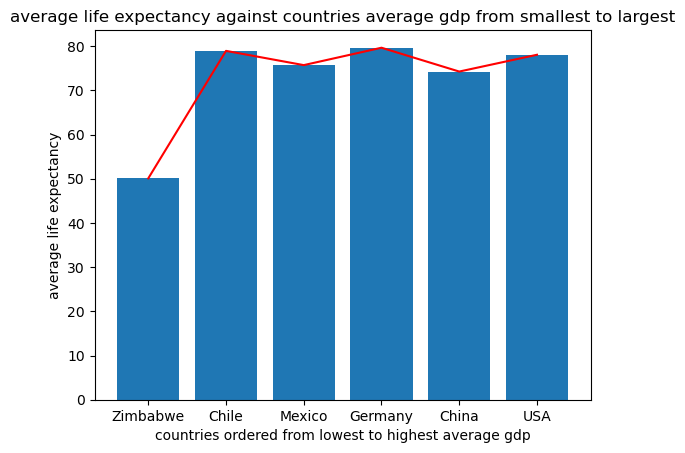

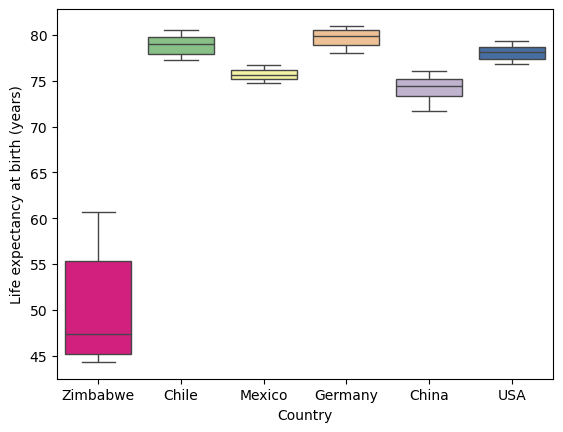

In [93]:
plt.bar(mean_gdp_df.Country, mean_gdp_df.mean_life_expectancy, )
plt.plot(mean_gdp_df.Country, mean_gdp_df.mean_life_expectancy, color='red')
plt.title('average life expectancy against countries average gdp from smallest to largest')
plt.xlabel('countries ordered from lowest to highest average gdp')
plt.ylabel('average life expectancy')
plt.show()
plt.clf()

sns.boxplot(x = 'Country', y = 'Life expectancy at birth (years)', data = df, hue = 'Country', palette = 'Accent', 
           order = country_order)
plt.xlabel('countries ordered from lowest to highest average gdp')
plt.show()

We can see from the above plot that appart from zimbarbwe higher average gdp does not imply higher average life expectancy.

Lets remove zimbabwe from the boxplot to see the relationship between the other countries more clearly in the boxplot.

   Country      mean_gdp  mean_life_expectancy
0    Chile  1.697888e+11              78.94375
1   Mexico  9.766506e+11              75.71875
2  Germany  3.094776e+12              79.65625
3    China  4.957714e+12              74.26250
4      USA  1.407500e+13              78.06250


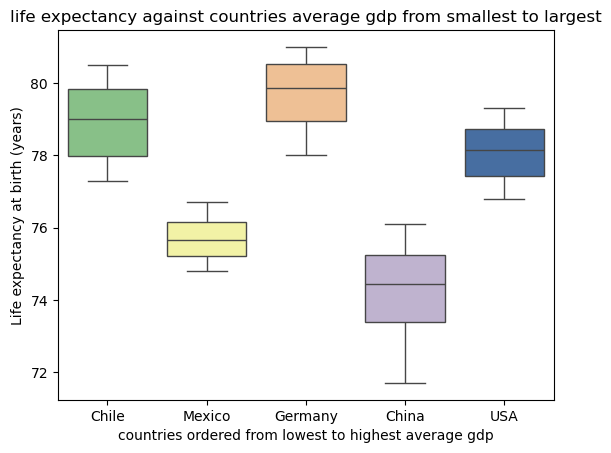

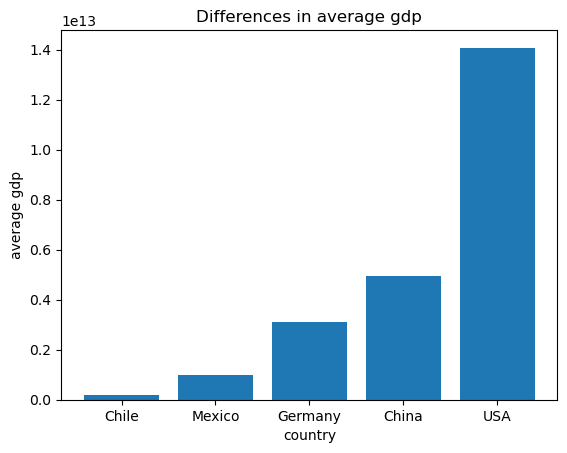

In [105]:
mean_gdp_df_not_zimbabwe = mean_gdp_df.loc[~(mean_gdp_df.Country == 'Zimbabwe'), :].reset_index(drop=True)
print(mean_gdp_df_not_zimbabwe)

df_not_zimbabwe = df.loc[~(df.Country == 'Zimbabwe'), :]

sns.boxplot(x = 'Country', y = 'Life expectancy at birth (years)', data = df_not_zimbabwe, hue = 'Country', palette = 'Accent', 
           order = country_order[1:])
plt.title('life expectancy against countries average gdp from smallest to largest')
plt.xlabel('countries ordered from lowest to highest average gdp')
plt.show()
plt.clf()

plt.bar(mean_gdp_df_not_zimbabwe.Country, mean_gdp_df_not_zimbabwe.mean_gdp)
plt.title('Differences in average gdp')
plt.xlabel("country")
plt.ylabel('average gdp')
plt.show()


It is now clear that countries with higher gdp do not have higher life expectancies. 
China has the second highest average gdp but the lowest average life expectancy while Chile has the lowest average gdp but the second highest average life expectancy.

It is clear that gdp and life expectancy do not have a clear ralationship when compared accross multiple countries but they are positively correlated  within the same country.

In zimbabwe, dgp and life expectancy is very low. One theory may be that gdp is related to life expectancy when it is extreemely low.